In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
import cv2, numpy as np, os

#parameters
working_dir = r'C:\Users\neera\Desktop\IIST\Assignments\CV project\shapes'
os.chdir(working_dir)
img_size = 60 #size of image fed into model

In [2]:
folders, labels, images = ['square', 'triangle'], [], []
for folder in folders:
 #   print folder
    for path in os.listdir(os.getcwd()+'/'+folder):
        img = cv2.imread(folder+'/'+path,0)
        #cv2.imshow('img', img)
        #cv2.waitKey(1)
        images.append(cv2.resize(img, (img_size, img_size)))
        labels.append(folders.index(folder))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state = 12)

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.reshape(X_train.shape[0], 60, 60, 1)
X_test = X_test.reshape(X_test.shape[0], 60, 60, 1)

In [4]:
# For sequential
def flatten(dimData, images):
    images = np.array(images)
    images = images.reshape(len(images), dimData)
    images = images.astype('float32')
    images /=255
    return images

#flatten data
dataDim = np.prod(images[0].shape)
train_data  = flatten(dataDim, X_train)
test_data = flatten(dataDim, X_test)

In [5]:
from keras.utils import to_categorical

#change labels to categorical
train_labels = np.array(y_train)
test_labels = np.array(y_test)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#determine the number of classes
classes = np.unique(train_labels)
nClasses  = len(classes)

Using TensorFlow backend.
c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\neera\Desktop\Lucid_demo\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\neera\Desktop\Lucid_demo\.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [19]:
def get_model(model_name = 'sequential'):
    
    if model_name == 'CNN':
        # building a linear stack of layers with the sequential model
        model = Sequential()
        # convolutional layer
        model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(60,60,1)))
        model.add(MaxPool2D(pool_size=(1,1)))
        # flatten output of conv
        model.add(Flatten())
        # hidden layer
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.1))
        # output layer
        model.add(Dense(nClasses, activation='softmax'))

        return model
    
    elif model_name == 'sequential':
        # dataDim = np.prod(images[0].shape)
        model = Sequential()
        model.add(Dense(256, activation = 'tanh', input_shape = (dataDim,)))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation='tanh'))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(nClasses, activation='softmax'))

        return model

In [20]:
model_cnn = get_model('CNN')

model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_cnn.fit(X_train, train_labels_one_hot, batch_size = 256, epochs=10, verbose=1,
                    validation_data=(X_test, test_labels_one_hot))

Train on 5239 samples, validate on 2246 samples
Epoch 1/10
5239/5239 [==============================] - 41s 8ms/step - loss: 7.8045 - acc: 0.5108 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 2/10
5239/5239 [==============================] - 39s 7ms/step - loss: 7.9560 - acc: 0.5064 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 3/10
5239/5239 [==============================] - 37s 7ms/step - loss: 7.9560 - acc: 0.5064 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 4/10
5239/5239 [==============================] - 32s 6ms/step - loss: 7.9560 - acc: 0.5064 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 5/10
5239/5239 [==============================] - 31s 6ms/step - loss: 7.9560 - acc: 0.5064 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 6/10
5239/5239 [==============================] - 30s 6ms/step - loss: 7.9560 - acc: 0.5064 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 7/10
5239/5239 [==============================] - 30s 6ms/step - loss: 7.9560 - acc: 0.5064 - val_loss: 8.1380 - val_acc: 0.4951
Epoch 8

In [21]:
#save model
model.save(r'c:\Users\neera\Desktop\Lucid_demo'+'/model_square_tri.h5')

In [10]:
from keras.models import load_model

model = load_model(r"C:\Users\neera\Desktop\Lucid_demo\model_square_tri.h5")

AttributeError: 'str' object has no attribute 'decode'

In [13]:
import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives

import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [53]:
sample_image = tf.random_uniform((1, 60, 60, 1))

# Convert the Keras model to TensorFlow graph
sess = tf.Session()
graph = sess.graph
with graph.as_default():
    keras_backend = tf.keras.backend.get_session()
    keras_backend.run(tf.global_variables_initializer())  # Initialize variables

    # Define the objective function to visualize activations from a specific layer
    def objective(t):
        return objectives.channel(t, keras_backend)

    # Generate the visualization
    vis = render.render_vis(model, objective_f=objective('layer_0'))

AttributeError: 'Sequential' object has no attribute 'import_graph'

In [46]:
sample_image = tf.random_uniform((1, 60, 60, 1))



# Convert the Keras model to TensorFlow graph
sess = tf.Session()
graph = sess.graph
with graph.as_default():
    keras_backend = tf.keras.backend.get_session()
    keras_backend.run(tf.global_variables_initializer())  # Initialize variables

    # Get the layer output for visualization
    layer_output = model_cnn.layers[1].output  # Change index for the desired layer

    # Run session to get the activations
    activations = keras_backend.run(layer_output, feed_dict={model_cnn.input: sample_image.eval(session=keras_backend)})


In [31]:
activations.shape

(1, 58, 58, 50)

In [38]:
reshaped_activations[0].shape

(58, 58)

In [47]:
reshaped_activations = activations.reshape( activations.shape[3], activations.shape[1], activations.shape[2])


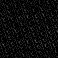

In [41]:
# Visualize the activations
show(reshaped_activations[])

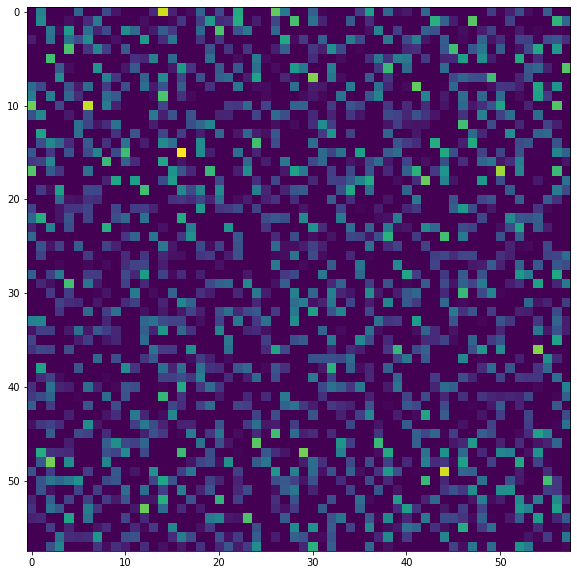

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(reshaped_activations[43])

In [ ]:
obj = objectives.channel("mixed5a_pre_relu", 800)
out_img = render.render_vis(model, obj) #thresholds=(1, 32, 128, 256, 512, 1024)


plt.imshow(out_img[0].squeeze())